## Create a linear regression model in Python to predict the CTC/Salary of new hires from the data provided

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

In [2]:
# Extracting the training data
data=pd.read_excel("Data_file.xlsx")
data.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [3]:
# dropping unwanted colums
data=data.drop(['S.No.'], axis = 1)

In [4]:
data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


## - Performing EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [6]:
data.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


### - Checking for missing values

In [7]:
data.isnull().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

- Here, we can see that there are no missing values in the data set

### Lets go ahead and check the correlation between the variables

### We have 3 categorical variables in the data
        - College
        - Role
        - City type
     We need to convert them into numeric.
     Also, the variables are ordinal. Hence, we will use the map() function.

In [8]:
data['College'].unique()
data['College']=data['College'].map({'Tier 1':2,'Tier 2':1,'Tier 3':0})

In [9]:
data['Role'].unique()
data['Role']=data['Role'].map({'Manager':1,'Executive':0})

In [10]:
data['City type'].unique()
data['City type']=data['City type'].map({'Metro':1,'Non-Metro':0})

In [11]:
data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,2,1,0,55523,3,66,19,71406.576531
1,1,0,1,57081,1,84,18,68005.870631
2,1,0,1,60347,2,52,28,76764.020277
3,0,0,1,49010,2,81,33,82092.386880
4,0,0,1,57879,4,74,32,73878.097729


In [12]:
data.corr()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
College,1.000000,0.001472,0.002384,0.016259,0.050243,0.024994,0.006760,0.179152
Role,0.001472,1.000000,0.076185,0.021208,-0.013131,0.014541,-0.025019,0.625435
City type,0.002384,0.076185,1.000000,0.036956,-0.001568,0.018550,-0.020856,0.211258
Previous CTC,0.016259,0.021208,0.036956,1.000000,0.008282,-0.037170,0.117035,0.270260
Previous job changes,0.050243,-0.013131,-0.001568,0.008282,1.000000,0.001507,0.034137,0.007518
Graduation marks,0.024994,0.014541,0.018550,-0.037170,0.001507,1.000000,-0.065412,-0.017557
Exp (Months),0.006760,-0.025019,-0.020856,0.117035,0.034137,-0.065412,1.000000,0.301569
CTC,0.179152,0.625435,0.211258,0.270260,0.007518,-0.017557,0.301569,1.000000


- Here, we can oberve that 'CTC' is positively correlated with most of the variables
- Thus, the change in these variables makes a significant change in 'CTC'

### lets create target and dependent variables

In [13]:
y=data[['CTC']]
x=data.drop(columns='CTC')

### Splitting the data into train and test

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=111)
len(x_train),len(x_test),len(y_train),len(y_test)

(1003, 335, 1003, 335)

### creating linear model

In [15]:
from sklearn.linear_model import LinearRegression
MLR=LinearRegression()
MLR_model=MLR.fit(x_train,y_train)
MLR_model

LinearRegression()

- Here model MLR_Model is ready

In [16]:
# finding m-value
MLR_model.coef_

array([[ 2.55713397e+03,  1.92774628e+04,  4.17885020e+03,
         3.69666693e-01, -4.54427764e+01, -4.44222529e+00,
         2.65169402e+02]])

### Predicting the CTC using our trained model

In [17]:
y_test['CTC_pred']=MLR_model.predict(x_test)
y_test.head()

,CTC,CTC_pred
1000,70944.167462,83559.839520
53,92378.502641,92383.634897
432,70832.226387,76381.154695
162,83984.481546,81192.756977
1020,81962.819031,80609.514398


## Evaluating the model

In [18]:
r_square=MLR_model.score(x_train,y_train)
print(" The r_squared value is:",r_square)

 The r_squared value is: 0.5854471211605076


### Finding the errors

In [19]:
error=y_test['CTC']-y_test['CTC_pred']
error.head()

1000   -12615.672059
53         -5.132256
432     -5548.928308
162      2791.724569
1020     1353.304633
dtype: float64

### Checking the normality for errors

<AxesSubplot:ylabel='Density'>

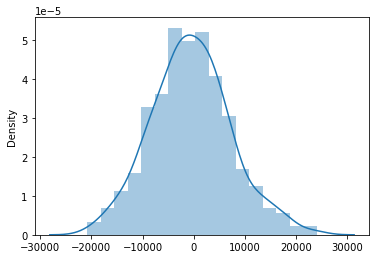

In [20]:
sns.distplot(error)

- Here, we can say that the errors are normality distributed

In [21]:
#calulating sq-error
y_test['sq_error']=error**2
y_test.head()

,CTC,CTC_pred,sq_error
1000,70944.167462,83559.839520,1.591552e+08
53,92378.502641,92383.634897,2.634005e+01
432,70832.226387,76381.154695,3.079061e+07
162,83984.481546,81192.756977,7.793726e+06
1020,81962.819031,80609.514398,1.831433e+06


In [22]:
# calulating mean error
error_mean=y_test['sq_error'].mean()
error_mean

60590391.079254754

### Finding RMSE value

In [23]:
import math
RMSE=math.sqrt(error_mean)
RMSE

7783.982982975666

### Getting the test data file

In [24]:
test_data=pd.read_excel("Test_data_file.xlsx")
test_data.head(3)

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631,NaN
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277,NaN


### Preprocessing

In [25]:
test_data=test_data.drop(['College_T1','College_T2','Role_Manager','City_Metro','Predicted CTC'],axis=1)

In [26]:
test_data.head()

,College,Role,City type,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   int64  
 1   Role                  1338 non-null   int64  
 2   City type             1338 non-null   int64  
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 83.8 KB


In [28]:
test_data=test_data.rename(columns={'previous CTC':'Previous CTC','previous job changes':'Previous job changes',
                           'Exp':'Exp (Months)','Actual CTC':'CTC'})

In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [31]:
test_data['College']=test_data['College'].map({'Tier 1':2,'Tier 2':1,'Tier 3':0})
test_data['Role']=test_data['Role'].map({'Manager':1,'Executive':0})
test_data['City type']=test_data['City type'].map({'Metro':1,'Non-Metro':0})
test_data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,2,1,0,55523,3,66,19,71406.576531
1,1,0,1,57081,1,84,18,68005.870631
2,1,0,1,60347,2,52,28,76764.020277
3,0,0,1,49010,2,81,33,82092.386880
4,0,0,1,57879,4,74,32,73878.097729


In [32]:
# lets create target and dependent variables
y1=test_data[['CTC']]
x1=test_data.drop(columns=['CTC'])
x1.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months)
0,2,1,0,55523,3,66,19
1,1,0,1,57081,1,84,18
2,1,0,1,60347,2,52,28
3,0,0,1,49010,2,81,33
4,0,0,1,57879,4,74,32


### Predicting the values for test data using our trained model

In [33]:
y1['Predicted CTC']=MLR_model.predict(x1)
y1.head()

,CTC,Predicted CTC
0,71406.576531,85311.870486
1,68005.870631,67977.820772
2,76764.020277,71933.554640
3,82092.386880,66382.531848
4,73878.097729,69336.146369


In [34]:
y1['error']=y1['CTC']-y1['Predicted CTC']
y1.head()

,CTC,Predicted CTC,error
0,71406.576531,85311.870486,-13905.293955
1,68005.870631,67977.820772,28.049858
2,76764.020277,71933.554640,4830.465637
3,82092.386880,66382.531848,15709.855032
4,73878.097729,69336.146369,4541.951361


<AxesSubplot:xlabel='error', ylabel='Density'>

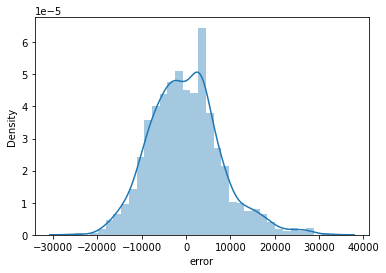

In [35]:
sns.distplot(y1['error'])

In [36]:
y1['error'].skew()

0.4834637767717711

- Errors are normally distributed

In [37]:
y1['Sqr-error']=y1['error']**2
y1.head()

,CTC,Predicted CTC,error,Sqr-error
0,71406.576531,85311.870486,-13905.293955,1.933572e+08
1,68005.870631,67977.820772,28.049858,7.867946e+02
2,76764.020277,71933.554640,4830.465637,2.333340e+07
3,82092.386880,66382.531848,15709.855032,2.467995e+08
4,73878.097729,69336.146369,4541.951361,2.062932e+07


In [38]:
MSE=y1['Sqr-error'].mean()
MSE

63543088.26193991

In [39]:
RMSE=math.sqrt(MSE)
print("RMSE value is:",RMSE)

RMSE value is: 7971.39186478371


In [40]:
# Predicted CTC
test_data['Predicted CTC']=y1['Predicted CTC']
test_data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Predicted CTC
0,2,1,0,55523,3,66,19,71406.576531,85311.870486
1,1,0,1,57081,1,84,18,68005.870631,67977.820772
2,1,0,1,60347,2,52,28,76764.020277,71933.554640
3,0,0,1,49010,2,81,33,82092.386880,66382.531848
4,0,0,1,57879,4,74,32,73878.097729,69336.146369


### Getting the range of predicted CTC

In [41]:
test_data['Predicted Upper Range']=test_data['Predicted CTC']+RMSE
test_data['Predicted Lower Range']=test_data['Predicted CTC']-RMSE
test_data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Predicted CTC,Predicted Upper Range,Predicted Lower Range
0,2,1,0,55523,3,66,19,71406.576531,85311.870486,93283.262350,77340.478621
1,1,0,1,57081,1,84,18,68005.870631,67977.820772,75949.212637,60006.428907
2,1,0,1,60347,2,52,28,76764.020277,71933.554640,79904.946505,63962.162775
3,0,0,1,49010,2,81,33,82092.386880,66382.531848,74353.923713,58411.139983
4,0,0,1,57879,4,74,32,73878.097729,69336.146369,77307.538233,61364.754504
